## Problem 3. PyTorch tutorial and questions

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


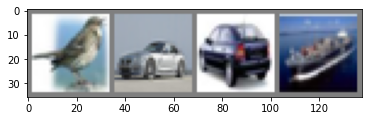

 bird   car   car  ship


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net = net.to(device)

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
training_loss = []
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            training_loss.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.205
[1,  4000] loss: 1.877
[1,  6000] loss: 1.675
[1,  8000] loss: 1.587
[1, 10000] loss: 1.513
[1, 12000] loss: 1.443
[2,  2000] loss: 1.379
[2,  4000] loss: 1.353
[2,  6000] loss: 1.325
[2,  8000] loss: 1.299
[2, 10000] loss: 1.263
[2, 12000] loss: 1.242
Finished Training


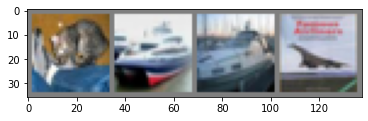

GroundTruth:    cat  ship  ship plane


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
images, labels = data[0].to(device), data[1].to(device)
outputs = net(images)

In [10]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  truck   cat   car   dog


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 82 %
Accuracy of  bird : 21 %
Accuracy of   cat : 32 %
Accuracy of  deer : 61 %
Accuracy of   dog : 58 %
Accuracy of  frog : 65 %
Accuracy of horse : 59 %
Accuracy of  ship : 55 %
Accuracy of truck : 56 %


#### How many images and batches are used to train the network?

In [13]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

There are 50000 images used to train the network. The batch size is 4, so the there are 50000/4=12500 batches are used to train the network. 

#### Do we normalize the images? What do we do in the example?
Yes, we normalize the images. The outputs of torchvision datasets are PILImage images of range [0, 1]. However, we need to normalize them to Tensors of normalized range [-1, 1], such that the mean is at 0. Thus, we use the formula below.

$$output = \frac{input-mean}{std}$$

We set both mean and set as 0.5. When the input is 0, the output is -1. When the input is 1, the output is 1. Also, this is a linear transformation.

#### The losses are dropping! Can you plot out the training loss?

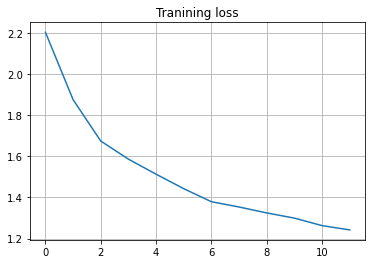

In [14]:
import matplotlib.pyplot as plt

plt.plot(training_loss)
plt.title('Tranining loss')
plt.grid(True)
plt.show()

#### Now the network is done training. Can you check some successful cases and some failure cases (show some images classified by the network)?

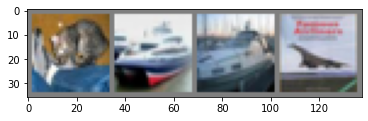

GroundTruth:   cat  ship  ship plane
Predicted:     cat   car   car plane
The 1st and 4th images are successful cases. Their predicted labels are correct).
The 2nd and 3rd image is a failure case.


In [16]:
dataiter = iter(testloader)
data = dataiter.next()
images, labels = data[0].to(device), data[1].to(device)

outputs = net(images)
_, predicted = torch.max(outputs.data, 1)

# print images
imshow(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth:', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
print('Predicted:  ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
print('The 1st and 4th images are successful cases. Their predicted labels are correct).')
print('The 2nd and 3rd image is a failure case.')

#### Can you visualize the output of the 1st layer of CNN using one image from the training set?

In [22]:
class FirstNN(nn.Module):
    def __init__(self):
        super(FirstNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # (number of input channels, number of output channels, kernel size)

    def forward(self, x):
        return self.conv1(x)

net_1st_layer = FirstNN().to(device)

In [23]:
data = next(iter(testloader))
image, labels = data[0].to(device), data[1].to(device)
out = net_1st_layer(image)
print(out.shape) # (batch size, number of output channels, (32−5)+1=28)

torch.Size([4, 6, 28, 28])


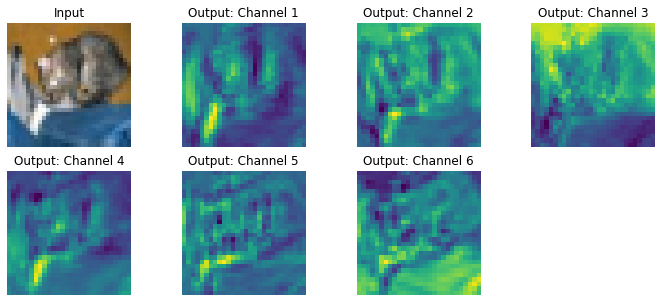

In [28]:
#image after convolution
image_1st_layer = out[0,:,:,:]

plt.figure(figsize = (12,5))
plt.subplot(2, 4, 1)
plt.imshow(image[0].cpu().numpy().transpose(1,2,0)*0.5+0.5)
plt.title('Input')
plt.axis('off')
for i in range(6):
    plt.subplot(2, 4, i+2)
    plt.imshow(image_1st_layer[i].detach().cpu().numpy())
    plt.title('Output: Channel %d' % (i+1))
    plt.axis('off')
plt.show()